In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.datasets import load_iris, load_wine, load_digits, load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
class Metric:
    @staticmethod
    def l1(a, b):
        return np.sqrt(np.sum(np.absolute(a - b)))

    @staticmethod
    def l2(a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    @staticmethod
    def l_inf(a, b):
        return np.max(np.absolute(a - b))

    @staticmethod
    def l_p(a, b, p):
        return np.power(np.sum(np.absolute((a - b) ** p)), 1/p)

In [17]:
class KNN:
    def __init__(self, k_neighbors=3, metric=Metric.l1):
        self.k_neighbors = k_neighbors
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        distances = np.apply_along_axis(self.__get_dist, 1, X)
        indexes = np.argpartition(distances, self.k_neighbors + 1, axis=1)[:, :self.k_neighbors]
        return [self.__get_lables(i) for i in indexes]

    def __get_lables(self, inds):
        unique, counts = np.unique(self.y[inds], return_counts=True)
        return unique[np.argmax(counts)]
    
    def __get_dist(self, x):
        return np.apply_along_axis(self.metric, 1, self.X, x)

In [148]:
load = load_breast_cancer()

X = load.data
y = load.target
target_names = load.target_names

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [153]:
knn = KNN(7, Metric.l2)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [154]:
accuracy_score(y_test, y_predict)

0.9090909090909091

In [127]:
def show_ROC(y_test, y_predict):
    rnd = np.random.rand
    for i in range(len(target_names)):
        fpr, tpr, treshold = roc_curve([1 if y_t == i else 0 for y_t in y_test], [1 if y_t == i else 0 for y_t in y_predict])
        roc_auc = auc(fpr, tpr)
        plt.rcParams.update({'figure.figsize': (5, 5)})
        plt.plot(fpr, tpr, color=(rnd(), rnd(), rnd()), label=f'{target_names[i]} (area = %0.2f)' % roc_auc)
        plt.plot([0, 1.03], [0, 1.03], color='navy', linestyle='--')
        plt.xlim([-0.03, 1.03])
        plt.ylim([0.03, 1.03])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")

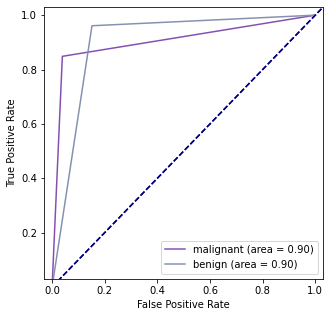

In [156]:
show_ROC(y_test, y_predict)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(4, metric=Metric.l1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9090909090909091

In [142]:
def find_parms():
    build_in_results = {}
    my_results = {}
    for metric in [Metric.l1, Metric.l2, Metric.l_inf]:
        for n in range(3, 8):
            build_in_model = KNeighborsClassifier(n_neighbors=n, metric=metric)
            build_in_model.fit(X_train, y_train)
            y_predict = build_in_model.predict(X_test)
            build_in_results[accuracy_score(y_test, y_predict)] = (n, metric)

            my_model = KNN(k_neighbors=n, metric=metric)
            my_model.fit(X_train, y_train)
            y_predict = my_model.predict(X_test)
            my_results[accuracy_score(y_test, y_predict)] = (n, metric)
    return build_in_results[max(build_in_results.keys())], my_results[max(my_results.keys())]

In [152]:
find_parms()

((4, <function __main__.Metric.l_inf(a, b)>),
 (7, <function __main__.Metric.l2(a, b)>))

ROC кривые для встроенного класса KNN


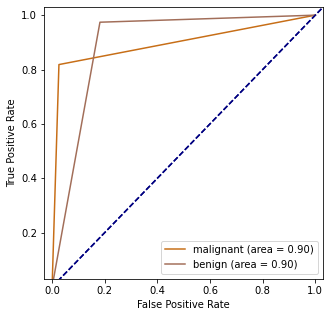

In [157]:
model = KNeighborsClassifier(n_neighbors=3, metric='l1')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('ROC кривые для встроенного класса KNN')
show_ROC(y_test, y_predict)